In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from collections import defaultdict
from pathlib import Path

import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [18]:
import sys 
#!{sys.executable} -m pip install git+https://github.com/textpipe/textpipe.git


* [1. Data Pre-Processing](#DPP)
    
    * [1.1. Renaming txt Files](#rename)

    * [1.2. Extracting Data](#extract)
    
    * [1.3. Clearing MetaData](#ClearMD)
    
* [2. Creating a Baseline](#Baseline)

<a class="anchor" id="DPP">

## 1. Data Preprocessing



<a class="anchor" id="rename">

### 1.1. Renaming .txt Files


In [28]:
#Changing the names of the .txt files so there's no duplicates

def change_file_name(author):
    i = 0
    my_dir_path = "Data/Corpora/train/" + author
    
    for filename in os.listdir(my_dir_path): 
        
        #Define the new and old names with directory path
        new_name =str(author) + str(i) + ".txt"
        old_name = my_dir_path + '/' + filename 
        new_name = my_dir_path + '/' + new_name 
        
        #So it doesn't give out an error when it runs for the second time
        # rename all the files 
        if new_name != old_name: #IT STILL GIVES OUT ERROR
            os.rename(old_name, new_name) 
        i += 1

In [29]:
authors = ['AlmadaNegreiros','CamiloCasteloBranco','EcaDeQueiros','JoseRodriguesSantos','JoseSaramago','LuisaMarquesSilva']
authors_sigla = ['AN','CCB','EQ','JRS','JS','LMS']

#### ONLY RUN ONCE IF ORIGINAL FILE NAMES otherwise it will give an error

In [5]:
#for a in range(len(authors)):
#    change_file_name(authors[a])

<a class="anchor" id="extract">

### 1.2. Extracting Data

In [30]:
#Create a df for one author the respective .txt files in the corpora
def create_df_from_txt(author):
    my_dir_path = "Data/Corpora/train/" + author

    results = defaultdict(list)
    for file in Path(my_dir_path).iterdir():
        with open(file, "r",encoding = 'utf8') as file_open:
            results["id"].append(file.name)
            results["text"].append(file_open.read())
            results["author"] = author
            file_open.close()
    df = pd.DataFrame(results)
    
    return df

In [31]:
#Join together the dataframes from all the authors
def join_df(authors):

    df = pd.DataFrame()
    for a in range(len(authors)):
        df = df.append(create_df_from_txt(authors[a]))
    df.reset_index(inplace = True, drop = True)    
    return df 

In [32]:
### Running all the functions

#Creating the training data frame
traindf = join_df(authors)

#Replacing the name of the authors with labels of their initials
for i in range(0,len(authors)):
    traindf.author = traindf.author.replace(authors[i],authors_sigla[i])
traindf

,id,text,author
0,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN
1,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN
2,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN
3,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN
4,AlmadaNegreiros4.txt,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,AN
5,AlmadaNegreiros5.txt,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,AN
6,AlmadaNegreiros6.txt,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",AN
7,AlmadaNegreiros7.txt,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,AN
8,AlmadaNegreiros8.txt,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,AN
9,CamiloCasteloBranco0.txt,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,CCB


<a class="anchor" id="clearMD">

### 1.2. Clearing MetaData
</a>

The majority of the .txt files have metadata at the beginning. This is unnecessary and may introduce noise in our model, as such it may be a good idea to remove it. 

In [19]:
import spacy

Testing with just one of the .txt:

In [20]:
test = traindf.iloc[0:1]
test

,id,text,author,cleaned txt with punct,cleaned txt no punct
0,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN,title: scena odio author: jose almada negreiro...,title scena odio author jose almada negreiro...


In [44]:
def set_custom_boundaries(doc):
    # Adds support to use '\n\n\n' as the delimiter for sentence detection
    for token in doc[:-1]:
        if token.text == '\n\n\n':
            doc[token.i+1].is_sent_start = True
    return doc


nlp = spacy.load('en_core_web_sm',disable=["parser"])
nlp.add_pipe(set_custom_boundaries)
custom_sentences = nlp(test.iloc[0,1])
custom_sentences = list(custom_sentences.sents)

i=0
for sentence in custom_sentences:
    print('**SPACE', i, '**', sentence)
    i +=1
#nlp_pt = spacy.load('pt_core_news_sm')

In [272]:
text_nometa = custom_sentences[1]

In [ ]:
#WIP.... 
#Works for a few of the .txt files if the meta data is just at the beginning but not if there are too many large spaces (/n/n/n) or if there are spaces between the text

<a class="anchor" id="clearTexts">

### 1.4. Cleaning Texts
</a>


In [45]:
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm_notebook as tqdm #progressbar
from unidecode import unidecode

In [46]:
def preprocessing(doc):
    processed_corpus = []
    stop_words = set(stopwords.words("portuguese"))
    for i in tqdm(range(len(doc))):
        text = doc['text'].iloc[i,]
        
        #Remove accents
        text = unidecode(text)

        #Lowercasing
        text = text.lower()
        
        # Convert to list from string
        text = text.split()

        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stop_words] 
        
        text = " ".join(text)
        processed_corpus.append(text)
         
    return processed_corpus

In [47]:
traindf['cleaned text with punctuation'] = preprocessing(traindf)

In [48]:
def nopunctuation(doc):
    processed_corpus = []
    for i in tqdm(range(len(doc))):
        text = doc['cleaned text with punctuation'].iloc[i,]
        
        #Remove punctuation
        text = re.sub('[^A-Za-z0-9]',' ', text) 
        
        text = "".join(text)
        processed_corpus.append(text)
         
    return processed_corpus

In [49]:
traindf['cleaned text without punctuation'] = nopunctuation(traindf)

<a class="anchor" id="Baseline">

## 2. Creating a Baseline
    
</a>

Our goal now is to create a naíve baseline to compare our model with. It won't involve any pre-processing of data or removal of extra meta data.

1st Try: Using DummyClassifier as a baseline? 

In [273]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [274]:
X = traindf.iloc[:,1]
y = traindf.iloc[:,2]
dummy_clf = DummyClassifier(strategy="most_frequent") #stratified
dummy_clf.fit(X, y)
#DummyClassifier(strategy='stratified')
dummy_clf.predict(X)


array(['CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB',
       'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB',
       'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB',
       'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB',
       'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB',
       'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB',
       'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB'],
      dtype='<U3')

In [275]:
dummy_clf.score(X, y)

0.31746031746031744

Too stupid of a baseline? 

## Choosing Evaluation Metrics

Can we use Accuracy as an evaluation metric? Depends if the dataset is unbalanced. Let's check:

In [276]:
traindf.iloc[:,2].value_counts()

CCB    20
JS     12
LMS     9
AN      9
JRS     8
EQ      5
Name: author, dtype: int64

It is unbalanced in favour of Camilo Castelo Branco which is why we get a higher accuracy when we use the DummyClassifier with most frequent strategy (0.31) compared to other strategies (stratified 0.22) even though it's just classifying all texts as belonging to CCB. As such accuracy may not be the best metric in this case.

## Word Cloud

To see a word cloud - or the most frequent words - written by a given author just type in the function one of the following siglas: 


In [277]:
authors_sigla

['AN', 'CCB', 'EQ', 'JRS', 'JS', 'LMS']

Corresponding to the following authors:

In [278]:
authors

['AlmadaNegreiros',
 'CamiloCasteloBranco',
 'EcaDeQueiros',
 'JoseRodriguesSantos',
 'JoseSaramago',
 'LuisaMarquesSilva']

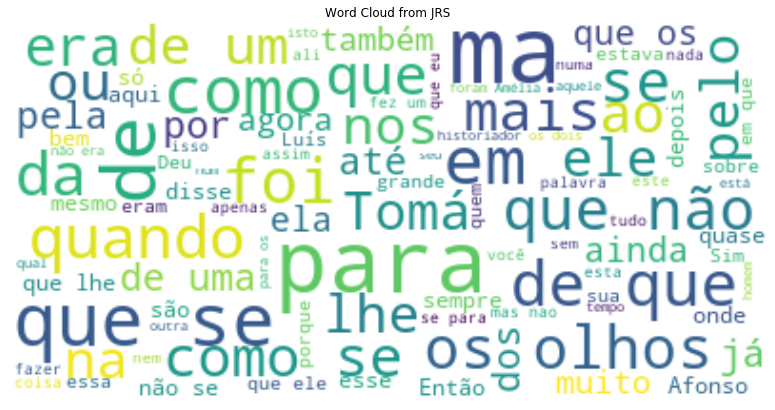

In [284]:
def word_cloud(author):
    word_cloud = " ".join(traindf[traindf['author']==author]['text'])


    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(word_cloud)
    # Display the generated image:
    plt.figure(figsize=(17,7))
    plt.title('Word Cloud from ' + author)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


word_cloud('JRS')

WILL NEED TO REMOVE STOP WORDS FIRST BEFORE IT MAKES ANY SENSE 